In [134]:
import requests
import pandas as pd

In [135]:
# Скачивание данных по ссылке:

url = 'https://testiws.ximad.com/export/events.csv.gz'
req = requests.get(url)
with open('events.csv.gz', "wb") as code:
    code.write(req.content)

del req    

In [136]:
# Загрузка скачанных по ссылке данных в таблицу:

events = pd.read_csv('events.csv.gz')

In [137]:
# Общая информация по данным:

events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3966791 entries, 0 to 3966790
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   event_time   object 
 1   event_name   object 
 2   user_id      object 
 3   event_value  float64
dtypes: float64(1), object(3)
memory usage: 121.1+ MB


In [138]:
df.head()

,event_time,event_name,user_id,event_value
0,2021-09-29,game_start,9586e17375389649,NaN
1,2021-09-23,game_finish,201bf35f4bb535fd,NaN
2,2021-09-25,game_finish,700eeb451fbf5197,NaN
3,2021-09-15,game_start,df651b8bdd042fd6,NaN
4,2021-09-09,game_finish,e84c3f343a5a66df,NaN


In [139]:
# Для расчета метрики APRDAU нам необходимо агрегировать данные по дням, поэтому в поле 'event_time' оставим 
# только дату события без времени:

df['event_time'] = pd.to_datetime(df['event_time']).dt.normalize()

In [140]:
# Посчитаем выручку по дням:

revenue = df.groupby('event_time')['event_value'].sum()
revenue

event_time
2021-09-07    1010.0
2021-09-08    1390.0
2021-09-09    1270.0
2021-09-10    1630.0
2021-09-11    1940.0
2021-09-12    1890.0
2021-09-13    1190.0
2021-09-14     790.0
2021-09-15    1340.0
2021-09-16     990.0
2021-09-17     600.0
2021-09-18    1170.0
2021-09-19    1400.0
2021-09-20     950.0
2021-09-21     660.0
2021-09-22     820.0
2021-09-23     760.0
2021-09-24    1480.0
2021-09-25     830.0
2021-09-26    1320.0
2021-09-27     930.0
2021-09-28     660.0
2021-09-29    1250.0
2021-09-30     620.0
Name: event_value, dtype: float64

In [141]:
# Посчитаем количество активных уникальных пользователей в день(DAU), исходя из значения поля 'event_name' равным 'launch' (запуск игры):

dau = df[df['event_name'] == 'launch'].groupby('event_time')['user_id'].nunique()
dau

event_time
2021-09-07    14686
2021-09-08    14482
2021-09-09    14574
2021-09-10    14537
2021-09-11    13637
2021-09-12    14220
2021-09-13    14607
2021-09-14    14539
2021-09-15    14276
2021-09-16    14300
2021-09-17    14242
2021-09-18    13491
2021-09-19    14085
2021-09-20    14353
2021-09-21    14434
2021-09-22    14326
2021-09-23    14249
2021-09-24    14215
2021-09-25    13584
2021-09-26    13965
2021-09-27    14336
2021-09-28    14459
2021-09-29    14144
2021-09-30     8327
Name: user_id, dtype: int64

In [142]:
# Посчитаем ARPDAU по всем дням:

arpdau = revenue / dau
arpdau

event_time
2021-09-07    0.068773
2021-09-08    0.095981
2021-09-09    0.087141
2021-09-10    0.112128
2021-09-11    0.142260
2021-09-12    0.132911
2021-09-13    0.081468
2021-09-14    0.054337
2021-09-15    0.093864
2021-09-16    0.069231
2021-09-17    0.042129
2021-09-18    0.086724
2021-09-19    0.099397
2021-09-20    0.066188
2021-09-21    0.045725
2021-09-22    0.057239
2021-09-23    0.053337
2021-09-24    0.104115
2021-09-25    0.061101
2021-09-26    0.094522
2021-09-27    0.064872
2021-09-28    0.045646
2021-09-29    0.088377
2021-09-30    0.074457
dtype: float64

<AxesSubplot:title={'center':'ARPDAU'}, xlabel='event_time'>

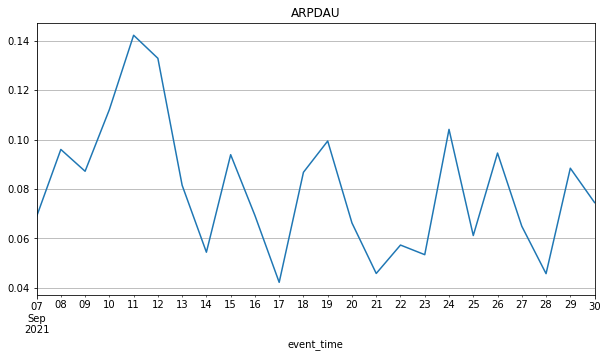

In [143]:
# График ARPDAU по дням:

arpdau.plot(figsize=(10, 5), title = 'ARPDAU', grid=True)

In [144]:
# При необходимости сохраним файл в нужном формате, например в CSV:

arpdau.to_csv('arpdau_2021-09-07_2021-09-30.csv')